In [ ]:
import requests
import pandas as pd
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

chromecast


In [ ]:
df = pd.DataFrame(requests.get("https://api.mercadolibre.com/sites/MLA/search?q=chromecast&limit=50#json").json()['results'])
df['amount'] = df.installments.map(lambda x: x['amount'])
df['rate'] = df.installments.map(lambda x: x['rate'])

price_median_chromecast = df.price.median()
amount_median_chromecast = df.amount.median()
rate_median_chromecast = df.rate.median()

Tv Apple

In [ ]:
df = pd.DataFrame(requests.get("https://api.mercadolibre.com/sites/MLA/search?q=TV Apple&limit=50#json").json()['results'])
df['amount'] = df.installments.map(lambda x: x['amount'])
df['rate'] = df.installments.map(lambda x: x['rate'])

price_median_tvApple = df.price.median()
amount_median_tvApple = df.amount.median()
rate_median_tvApple = df.rate.median()

Amazon Fire TV

In [ ]:
df = pd.DataFrame(requests.get("https://api.mercadolibre.com/sites/MLA/search?q=Amazon Fire TV&limit=50#json").json()['results'])
df['amount'] = df.installments.map(lambda x: x['amount'])
df['rate'] = df.installments.map(lambda x: x['rate'])

price_median_amazonFireTv = df.price.median()
amount_median_amazonFireTv = df.amount.median()
rate_median_amazonFireTv = df.rate.median()

In [ ]:
serie_class = pd.Series(['Chromecast','Tv Apple','Amazon Fire TV'])
serie_price_median = pd.Series([price_median_chromecast,price_median_tvApple,price_median_amazonFireTv])
serie_amount_median = pd.Series([amount_median_chromecast,amount_median_tvApple,amount_median_amazonFireTv])
serie_rate_median = pd.Series([rate_median_chromecast,rate_median_tvApple,rate_median_amazonFireTv])

In [ ]:
df_price = pd.DataFrame({'products':serie_class,'values':serie_price_median})
df_price['type'] = 'price'
df_price

,products,values,type
0,Chromecast,15293.5,price
1,Tv Apple,20999.0,price
2,Amazon Fire TV,14102.5,price


In [ ]:
df_amount = pd.DataFrame({'products':serie_class,'values':serie_amount_median})
df_amount['type'] = 'amount'
df_amount

,products,values,type
0,Chromecast,3807.525,amount
1,Tv Apple,4455.615,amount
2,Amazon Fire TV,3114.115,amount


In [ ]:
df_rate = pd.DataFrame({'products':serie_class,'values':serie_rate_median})
df_rate['type'] = 'rate'
df_rate

,products,values,type
0,Chromecast,48.35,rate
1,Tv Apple,48.35,rate
2,Amazon Fire TV,48.35,rate


In [ ]:
df = pd.concat([df_price,df_amount,df_rate],axis=0)

Comparativa Dispositivos Moviles

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


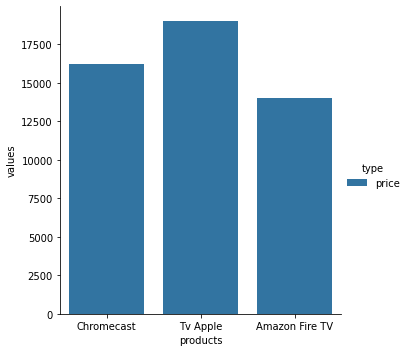

In [ ]:
sns.factorplot(x='products', y='values', hue='type', data=df_price, kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


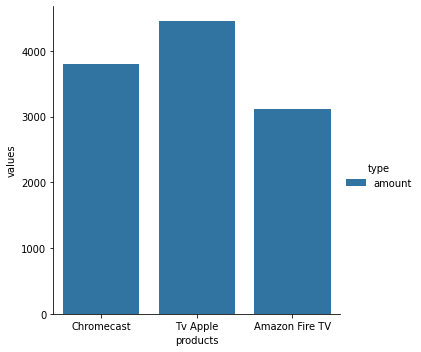

In [ ]:
sns.factorplot(x='products', y='values', hue='type',data=df_amount, kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


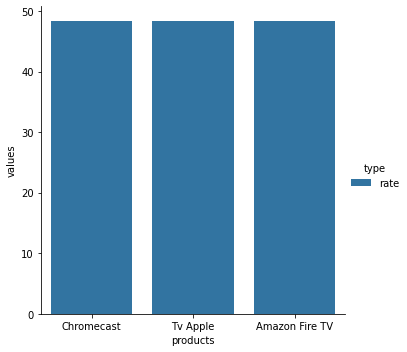

In [ ]:
sns.factorplot(x='products', y='values', hue='type', data=df_rate, kind='bar')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


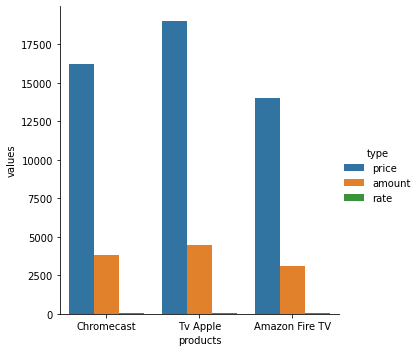

In [ ]:
sns.factorplot(x='products', y='values', hue='type', data=df, kind='bar')

2

In [ ]:
df = pd.DataFrame(requests.get("https://api.mercadolibre.com/sites/MLA/search?q=chromecast&limit=50#json").json()['results'])
df['amount'] = df.installments.map(lambda x: x['amount'])
df['rate'] = df.installments.map(lambda x: x['rate'])

In [ ]:
for indx, i in enumerate(df['id']):
    print(indx)
    if indx==0:
        json_get = requests.get("https://api.mercadolibre.com/items/"+i).json()
        df = pd.DataFrame(requests.get("https://api.mercadolibre.com/items/"+i).json()['sale_terms'])
        df['id'] = json_get['id']
        df['site_id'] = json_get['site_id']
        df['title'] = json_get['title']
        df['subtitle'] = json_get['subtitle']
        df['seller_id'] = json_get['seller_id']
        df['category_id'] = json_get['category_id']
        df['official_store_id'] = json_get['official_store_id']
        df['price'] = json_get['price']
        df['base_price'] = json_get['base_price']
        df['original_price'] = json_get['original_price']
        df['currency_id'] = json_get['currency_id']
        df['initial_quantity'] = json_get['initial_quantity']
        df['available_quantity'] = json_get['available_quantity']
        df['sold_quantity'] = json_get['sold_quantity']
    else:
        json_get = requests.get("https://api.mercadolibre.com/items/"+i).json()
        df_aux = pd.DataFrame(requests.get("https://api.mercadolibre.com/items/"+i).json()['sale_terms'])
        df_aux['id'] = json_get['id']
        df_aux['site_id'] = json_get['site_id']
        df_aux['title'] = json_get['title']
        df_aux['subtitle'] = json_get['subtitle']
        df_aux['seller_id'] = json_get['seller_id']
        df_aux['category_id'] = json_get['category_id']
        df_aux['official_store_id'] = json_get['official_store_id']
        df_aux['price'] = json_get['price']
        df_aux['base_price'] = json_get['base_price']
        df_aux['original_price'] = json_get['original_price']
        df_aux['currency_id'] = json_get['currency_id']
        df_aux['initial_quantity'] = json_get['initial_quantity']
        df_aux['available_quantity'] = json_get['available_quantity']
        df_aux['sold_quantity'] = json_get['sold_quantity']
        
        df = pd.concat([df,df_aux],axis=0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49


In [ ]:
df.to_csv('get_data_process.csv',sep='|',index=False)

In [ ]:
from google.colab import files
files.download('get_data_process.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>